In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats
from sklearn import linear_model

In [5]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4)

In [6]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


## Preparing data set

Preparing a data set to use with linear regression(multivariable), we're using these variables: Population, Murder, robbery, and Property crime. We will use these to predict our target variable, property crime. 

In [7]:
#removing first rape column every entry was NAN
df = df.drop('Rape\n(revised\ndefinition)1', axis=1)

#removing last three rows NAN values
df = df.drop([348,349,350])

#renaming columns
df.columns = ['City', 'Population', 'Violent', 'Murder', 'Rape', 'Robbery', 'Aggravated assault',
              'Property crime', 'Burglary','Larceny theft', 'Motor vehicle theft', 'Arson']

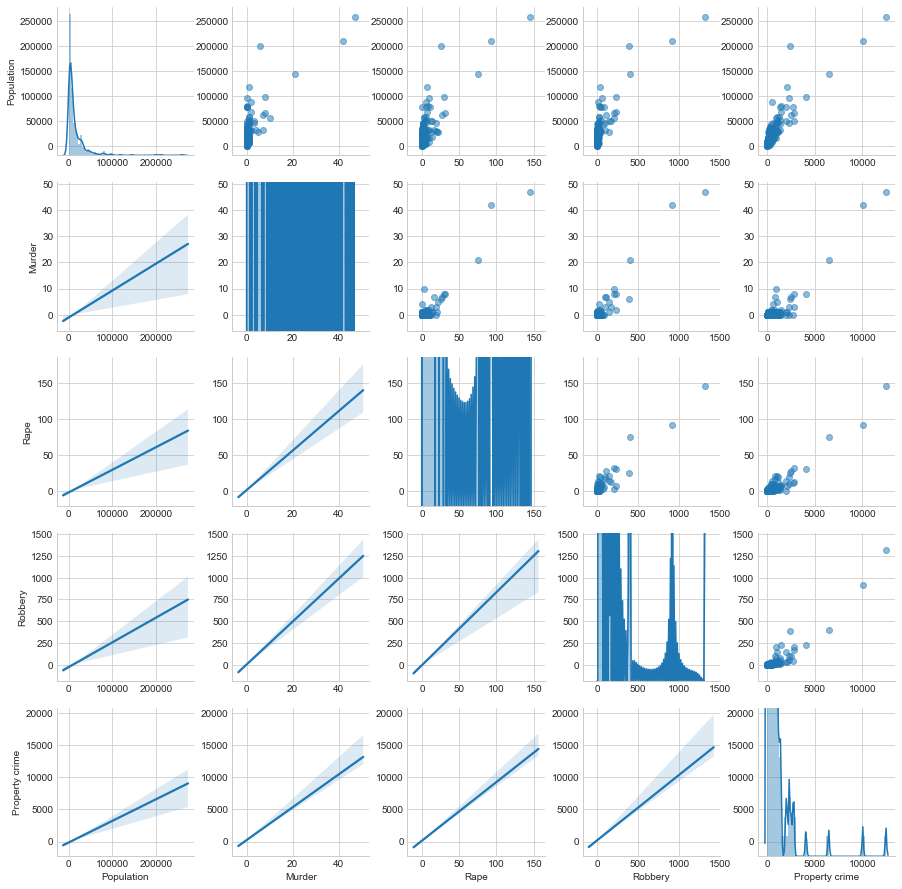

In [8]:
#Reducing dataframe columns to variables of interest
newdf = df[['City', 'Population', 'Murder', 'Rape', 'Robbery', 'Property crime']]

#droping newyork city outlier, to make graphs easy to read
newdf = newdf.drop(216)

#Plotting scatter plot matrix
g = sns.PairGrid(newdf)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.distplot)
plt.show()

## Feature extraction

Squaring populations, Changing murder and robbery to binary categorical features

In [9]:
#squaring population
df['Pop_squared'] = df['Population'] * df['Population']
#Creating binary categorical feature out of continuous variable columns, murder and robbery.
df['Murder_f'] = np.where((df['Murder'] == 0), 0, 1)
df['robbery_f']  = np.where((df['Robbery'] == 0), 0, 1)

In [10]:
#Reducing columns
df = df[['City', 'Property crime', 'Population', 'Pop_squared', 'Murder_f', 'robbery_f']]
df.head()

,City,Property crime,Population,Pop_squared,Murder_f,robbery_f
0,Adams Village,12.0,1861.0,3.463321e+06,0,0
1,Addison Town and Village,24.0,2577.0,6.640929e+06,0,0
2,Akron Village,16.0,2846.0,8.099716e+06,0,0
3,Albany,4090.0,97956.0,9.595378e+09,1,1
4,Albion Village,223.0,6388.0,4.080654e+07,0,1


## Modeling

Setting up multivariable linear regression model.

In [25]:
regr = linear_model.LinearRegression()
Y = df['Property crime']
X = df[['Population', 'Murder_f', 'robbery_f']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [  1.68728222e-02   6.07383740e+02   1.06994709e+02]

Intercept: 
 -32.7222682393

R-squared:
0.993448543573


Model explains 99% of our variance, it's very high which is good, but probably a bit too high, and overfit.  Our model is fairly simple with binary independent varaibles.

In [14]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Murder_f,robbery_f
Population,1.000000,0.162309,0.064371
Murder_f,0.162309,1.000000,0.313271
robbery_f,0.064371,0.313271,1.000000


Correlation between robbery and murder is a bit high. That's a result of the binary features.

In [23]:
#Look at anecdotal evidence of our prediction, comparing property crime to predicted property crime
df['Predicted'] = predicted
df[['Population', 'Murder_f', 'robbery_f', 'Property crime', 'Predicted']].head()

,Population,Murder_f,robbery_f,Property crime,Predicted
0,1861.0,0,0,12.0,-1.321946
1,2577.0,0,0,24.0,10.758995
2,2846.0,0,0,16.0,15.297784
3,97956.0,1,1,4090.0,2334.450355
4,6388.0,0,1,223.0,182.056029
